In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
stat_1 = pd.read_csv('C:/Users/1/Desktop/Proj/statistic.csv')

In [48]:
stat_2 = pd.read_csv('C:/Users/1/Desktop/Proj/statistic_2.csv')

In [49]:
# C:/Users/regio/Desktop/Робот/statisitic.csv
# C:/Users/regio/Desktop/Робот/statisitic2.csv

# Построить графики

## Изменеие прибыли

In [50]:
def build_profit(data):    
    plt.figure(figsize=(13, 3))
    plt.plot(data['Дата входа'], data['Текущая прибыль'],  label = 'Текущая прибыль')
    plt.ylabel('Текущая прибыль, %')
    plt.xlim(data['Дата входа'].iloc[0], data['Дата входа'].iloc[-1])
    plt.legend(loc = 'upper left')
    plt.grid()
    return plt.show() 

## Cила тренда

In [51]:
def build_trend():    
    plt.figure(figsize=(13, 7))
    plt.xlim(0, 1)
    plt.xlim(0, 1)
    x1, y1 = [0, 1], [1, LIMIT_TREND_RSI_70]
    x2, y2 = [0, 1], [1, LIMIT_TREND_RSI_30] 
    x3, y3 = [0, 1], [1, trend_powere_mean_long_RSI_70]
    x4, y4 = [0, 1], [1, trend_powere_mean_short_RSI_70]
    x5, y5 = [0, 1], [1, trend_powere_mean_long_RSI_30]
    x6, y6 = [0, 1], [1, trend_powere_mean_short_RSI_30]
    plt.plot(x1, y1, label = 'Порог тренда RSI 70')
    plt.plot(x2, y2, label = 'Порог тренда RSI 30')
    plt.plot(x3, y3, label = 'Средняя сила тренда в ЛОНГ RSI 70')
    plt.plot(x4, y4, label = 'Средняя сила тренда в ШОРТ RSI 70')
    plt.plot(x5, y5, label = 'Средняя сила тренда в ЛОНГ RSI 30')
    plt.plot(x6, y6, label = 'Средняя сила тренда в ШОРТ RSI 30')
    plt.ylabel('Порог силы тренда')
    plt.legend(loc = 'upper left')
    plt.grid()
    return plt.show() 

# БОТ 1

In [52]:
stat_1['Прибыль/Убыток'] = np.where(stat_1['Прибыль'] > 0, 1, 0)
stat_1['Текущая прибыль'] = stat_1['Прибыль'].cumsum().round(2)
display(stat_1)
print('Суммарная прибыль, %:', round(stat_1['Прибыль'].sum(), 2))

,Монета,Направление,Дата входа,Дата выхода,Прибыль,RSI_5M при входе,RSI_1H при входе,Прибыль/Убыток,Текущая прибыль
0,BANDUSDT,Лонг,2023-04-13 08:30:03,2023-04-13 10:21:31,0.400000,27.11,42.72,1,0.40
1,BANDUSDT,Лонг,2023-04-13 08:30:03,2023-04-13 16:14:29,1.214247,27.11,42.72,1,1.61
2,BATUSDT,Шорт,2023-04-13 16:19:39,2023-04-13 17:11:32,0.400000,82.63,59.41,1,2.01
3,BATUSDT,Шорт,2023-04-13 16:19:39,2023-04-14 07:15:15,-0.400000,82.63,59.41,0,1.61
4,BATUSDT,Шорт,2023-04-14 07:20:05,2023-04-14 07:39:49,-0.800000,71.81,62.04,0,0.81


Суммарная прибыль, %: 0.81


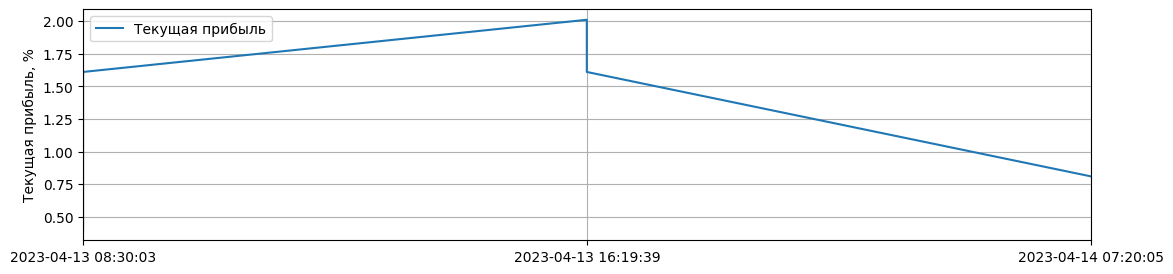

In [53]:
build_profit(stat_1)

In [54]:
Монеты = stat_1.pivot_table(index = 'Монета', values = 'Прибыль/Убыток', aggfunc = ['mean', 'count']).reset_index()
Монеты = Монеты.rename(columns={'mean' : 'Процент прибыльных сделок', 'count' : 'Количество сделок'})
#Монеты = Монеты.sort_values()
Монеты

,Монета,Процент прибыльных сделок,Количество сделок
,,Прибыль/Убыток,Прибыль/Убыток
0,BANDUSDT,1.000000,2
1,BATUSDT,0.333333,3


# БОТ 2

In [55]:
stat_2['Прибыль/Убыток'] = np.where(stat_2['Прибыль'] > 0, 1, 0)
stat_2['Текущая прибыль'] = stat_2['Прибыль'].cumsum().round(2)
display(stat_2)
print('Суммарная прибыль, %:', round(stat_2['Прибыль'].sum(), 2))

,Монета,Направление,Дата входа,Дата выхода,Прибыль,RSI_5M при входе,RSI_1H при входе,Прибыль/Убыток,Текущая прибыль
0,RLCUSDT,Лонг,2023-04-13 08:38:50,2023-04-13 09:52:02,-0.8,31.94,51.68,0,-0.8
1,PEOPLEUSDT,Шорт,2023-04-13 10:20:13,2023-04-13 13:54:06,0.4,68.21,53.77,1,-0.4
2,PEOPLEUSDT,Шорт,2023-04-13 10:20:13,2023-04-13 15:34:19,-0.4,68.21,53.77,0,-0.8
3,BELUSDT,Шорт,2023-04-13 15:40:12,2023-04-13 15:57:18,-0.8,73.75,54.15,0,-1.6
4,BNBUSDT,Шорт,2023-04-13 15:57:47,2023-04-13 18:01:42,-0.8,87.34,59.69,0,-2.4
5,ETHUSDT,Шорт,2023-04-13 18:05:10,2023-04-13 19:55:45,-0.8,69.03,79.93,0,-3.2
6,KSMUSDT,Шорт,2023-04-13 19:56:57,2023-04-13 20:06:17,0.4,78.23,71.75,1,-2.8
7,KSMUSDT,Шорт,2023-04-13 19:56:57,2023-04-14 00:36:46,-0.4,78.23,71.75,0,-3.2
8,OCEANUSDT,Шорт,2023-04-14 00:45:27,2023-04-14 03:07:08,0.4,77.35,61.13,1,-2.8
9,OCEANUSDT,Шорт,2023-04-14 00:45:27,2023-04-14 04:27:30,-0.4,77.35,61.13,0,-3.2


Суммарная прибыль, %: -4.0


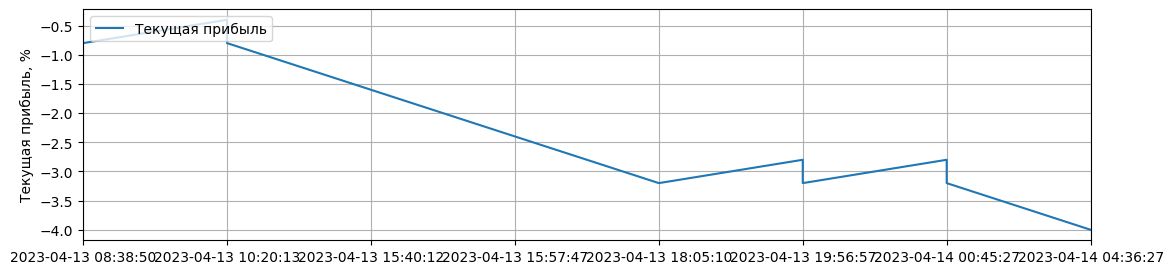

In [56]:
build_profit(stat_2)

# Разбор ситуаций

## Доля прибыльных сделок в зависимости от ситуации

### БОТ 1

In [57]:
Стат_1 = stat_1.pivot_table(index = 'Направление', values = 'Прибыль/Убыток', aggfunc = ['mean', 'count']).reset_index()
Стат_1 = Стат_1.rename(columns={'mean' : 'Процент прибыльных сделок', 'count' : 'Количество сделок'})

In [58]:
display(Стат_1)

,Направление,Процент прибыльных сделок,Количество сделок
,,Прибыль/Убыток,Прибыль/Убыток
0,Лонг,1.000000,2
1,Шорт,0.333333,3


### БОТ 2

In [59]:
Стат_2 = stat_2.pivot_table(index = 'Направление', values = 'Прибыль/Убыток', aggfunc = ['mean', 'count']).reset_index()
Стат_2 = Стат_2.rename(columns={'mean' : 'Процент прибыльных сделок', 'count' : 'Количество сделок'})

In [60]:
display(Стат_2)

,Направление,Процент прибыльных сделок,Количество сделок
,,Прибыль/Убыток,Прибыль/Убыток
0,Лонг,0.0,1
1,Шорт,0.3,10
